# Diabetes Prediction
### Predict the onset of diabetes based on diagnostic measures

This dataset is taken from kaggle : https://www.kaggle.com/johndasilva/diabetes

In [1]:
#Its an good idea to import some essential libraries at the beginning for our data analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the Dataset
df = pd.read_csv('dataset/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
# Finding the shape of the data...ie Total number of rows and columns
df.shape

(2000, 9)

In [5]:
# Observing the types of the columns our dataset is having
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
# describe method returns the basic statistics of all the numerical columns
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [7]:
# Column names
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# renaming the DiabetesPedigreeFunction column to DPF for our ease
df.rename(columns = {'DiabetesPedigreeFunction' : 'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


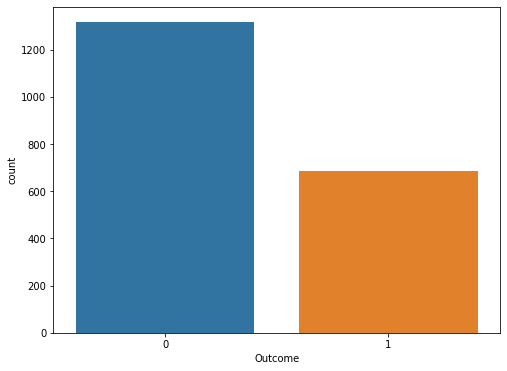

In [9]:
# Observing the oucome column (dependent column)
plt.figure(figsize=(8,6))
sns.countplot(x='Outcome',data=df)
plt.show()

# Data Cleaning

In [10]:
# Finding the count of null values for each column.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# NOTE: When the missing values are observed there are no missing values but in this data set many columns are having 0 values 
# which also indicated the NaN values 

# np.where(df['SkinThickness']==0,1,0).sum()
df['SkinThickness'].isin([0]).sum()


573

In [12]:
#temp_df = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']]
# These columns are having 0 values 
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

df[cols].head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,138,62,35,0,33.6
1,84,82,31,125,38.2
2,145,0,0,0,44.2
3,135,68,42,250,42.3
4,139,62,41,480,40.7


In [13]:
# checking how many number zeros are there in these columns
df[cols].isin([0]).sum()

Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
dtype: int64

In [14]:
# Now replacing all 0's with the NaN values so that it is easy for us to impute the NaN values
df[cols] = df[cols].replace(0,np.NaN)

In [15]:
df[cols].head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,138.0,62.0,35.0,NaN,33.6
1,84.0,82.0,31.0,125.0,38.2
2,145.0,NaN,NaN,NaN,44.2
3,135.0,68.0,42.0,250.0,42.3
4,139.0,62.0,41.0,480.0,40.7


In [16]:
df[cols].isnull().sum()

Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
dtype: int64

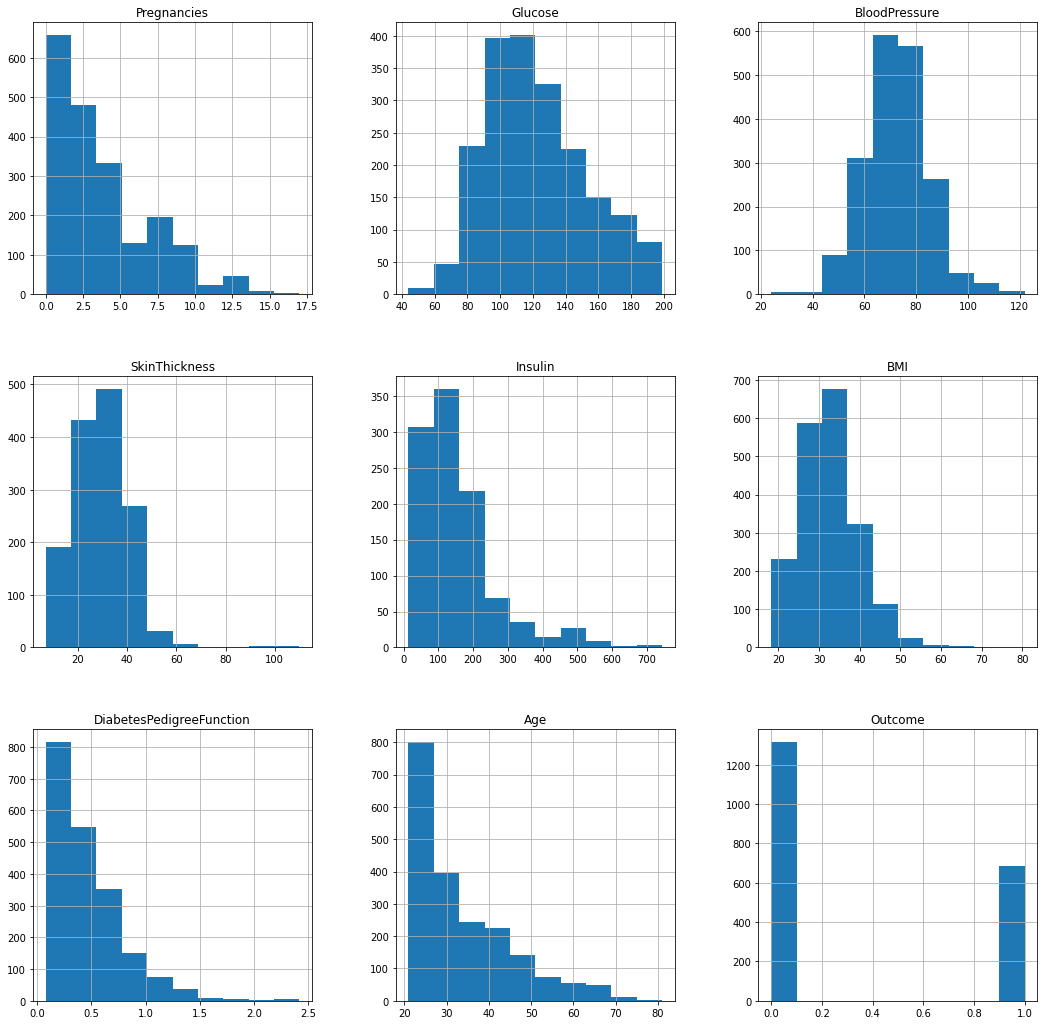

In [17]:
# In order to fill the NaN values of the columns we first need to understand the distribution of each and every numerical column

# Lets first plot the histogram of the dataset before imputing all the NaN values

tdf = df.hist(figsize=(18,18))

In [18]:
# After observing the distribution of all the columns lets now impute the NaN values 
# Not we are doing this in my temp_df dataframe


df['Glucose']       =  df['Glucose'].fillna(df['Glucose'].median())
df['BloodPressure'] =  df['BloodPressure'].fillna(df['BloodPressure'].median())
df['SkinThickness'] =  df['SkinThickness'].fillna(df['SkinThickness'].median())
df['Insulin']       =  df['Insulin'].fillna(df['Insulin'].median())
df['BMI']           =  df['BMI'].fillna(df['BMI'].median())


In [19]:
# Now we have imputed all the NaN values( remember earlier we first replaced all the 0's with NaN then imputed those!)
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

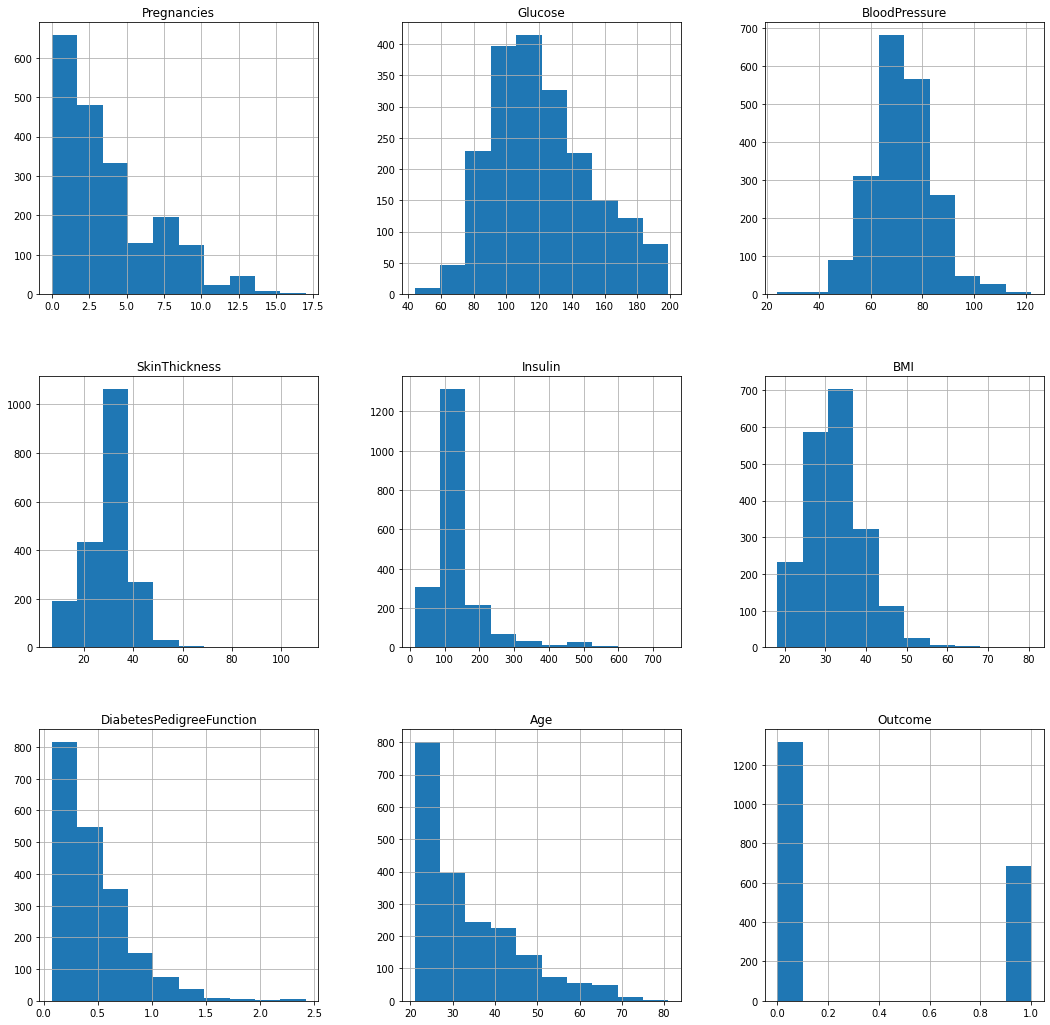

In [20]:
# Histogram after imputing all the NaN values.
a = df.hist(figsize=(18,18))

In [21]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

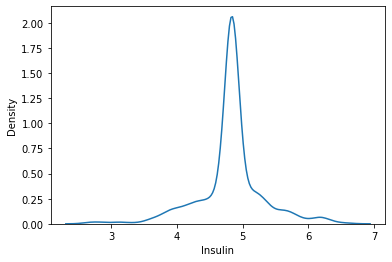

In [22]:
# Kdeplot of the seaborn gives more clear visualization about how your data is distributed
sns.kdeplot(np.log(df['Insulin']))

# Model Building

In [23]:
# Dividing into Independent and dependent variable
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [24]:
# lets first split the data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape,X_test.shape)

(1500, 8) (500, 8)


In [26]:
# Lets perform some feature scaling (Not all the ML algorithims requires feature scaling but some of those that uses gradient Descent
# do require feature scaling)
# Those Ml algorithims that are basically ensemble techniques that are based on trees do not require any feature scaling.
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()
X_train = standardscaler.fit_transform(X_train)
X_test = standardscaler.transform(X_test)


In [27]:
# importing all the necessary ML algorithims.

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [29]:
# Creating a custom function for choosing a best model with the default parameters first
def best_model(X,y):
    models = {
        
        'logistic_regression' : {
            'model' : LogisticRegression(solver='lbfgs',multi_class='auto'),
            'parameters' : {
                'C' : [1.0,2.0,5.0,10.0]
            }
        },
        
        'decision_tree' : {
            'model' : DecisionTreeClassifier(criterion='gini',splitter='best'),
            'parameters' : {
                'max_depth' : [2,3,4,5,6]
            }
        },
        'random_forest' : {
            'model' : RandomForestClassifier(criterion='gini'),
            'parameters' : {'n_estimators' : [100,200,300,400,500]}
        },
        'svm' : {
            'model' : SVC(),
            'parameters' : {'C' : [1.0,2.0,3.0], 'kernel' : ['rbf','linear']}
        }
    }
    
    scores = []
    cv_shuffle = ShuffleSplit(n_splits=5,test_size=0.25,random_state=0)
    
    for model_name , model_param in models.items():
        
        grd = GridSearchCV(model_param['model'],model_param['parameters'],cv=cv_shuffle)
        grd.fit(X,y)
        scores.append({
            'Model' : model_name,
            'Best_parameters' : grd.best_params_,
            'Scores' : grd.best_score_
        })
    return pd.DataFrame(scores)
best_model(X_train,y_train)

,Model,Best_parameters,Scores
0,logistic_regression,{'C': 1.0},0.771733
1,decision_tree,{'max_depth': 6},0.803200
2,random_forest,{'n_estimators': 200},0.945067
3,svm,"{'C': 3.0, 'kernel': 'rbf'}",0.826133


### Since the Random Forest is giving us the best accuracy so we will go with the RandomForestClassifier 

In [30]:
# Using cross_val_score for gaining avg accuracy
from sklearn.model_selection import cross_val_score

cv = cross_val_score(RandomForestClassifier(),X_train,y_train,cv=10)
print(cv)
print('Average Accuracy is : {} %'.format((np.round(cv.mean(),3))*100))

[0.92666667 0.95333333 0.99333333 0.97333333 0.96666667 0.96
 0.96666667 0.96666667 0.88       0.98666667]
Average Accuracy is : 95.7 %


In [31]:
# Creating Random Forest Model (we will be taking the default parameters itself because its giving the best results :D
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

# Model Evaluation

In [32]:
# Now lets Evaluate our model on the test set
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))


[[330   4]
 [  4 162]]


<AxesSubplot:>

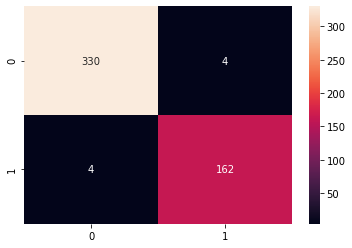

In [33]:
# Plotting the confusion matrix for the Test set
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g')

In [34]:
#Confusion matrix for the Test Data
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       334
           1       0.98      0.98      0.98       166

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



In [35]:
print('The Accuracy Score on the Test Data is ',accuracy_score(y_test,y_pred)*100,'  %')

The Accuracy Score on the Test Data is  98.4   %


# Predictions

In [54]:
# Creating the function for prediction
def Diabetes_Prediction(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age) :
    
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)
    
    x = [[preg,glucose,bp,st,insulin,bmi,dpf,age]]
    x = standardscaler.transform(x)
    
    return classifier.predict(x)


In [56]:
# Sample Output 1 
predict = Diabetes_Prediction(2,81,72,15,76,30.1,0.547,25)
if predict :
    print("You Have Diabetes :( ")
else :
    print('WoW !! You dont have diabetes :)')

WoW !! You dont have diabetes :)


In [57]:
# Sample Output 2 
predict = Diabetes_Prediction(1,117,88,24,145,34.5,0.403,40)
if predict :
    print("You Have Diabetes :( ")
else :
    print('WoW !! You dont have diabetes :)')

You Have Diabetes :( 


In [58]:
# Sample Output 3 
predict = Diabetes_Prediction(5,120,92,10,81,26.1,0.551,67)
if predict :
    print("You Have Diabetes :( ")
else :
    print('WoW !! You dont have diabetes :)')

WoW !! You dont have diabetes :)
